In [1]:
# 1：ライブラリのインポート--------------------------------
import numpy as np #numpyという行列などを扱うライブラリを利用
import pandas as pd #pandasというデータ分析ライブラリを利用
import matplotlib.pyplot as plt #プロット用のライブラリを利用
from sklearn import svm, metrics, preprocessing #機械学習用のライブラリを利用
import sklearn.model_selection as cross_validation
from mlxtend.plotting import plot_decision_regions #学習結果をプロットする外部ライブラリを利用
from matplotlib.colors import ListedColormap #plot用

from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [2]:
# 2：XORのデータを作成する(x=正、y=正)=0,(x=正、y=負)=1, 的な--------------
np.random.seed(0)
X_xor=np.random.randn(200,2) 
y_xor=np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)
y_xor=np.where(y_xor,1,0)
pd.DataFrame(y_xor)  #この行を実行するとデータが見れる

,0
0,0
1,0
2,1
3,1
4,1
...,...
195,1
196,0
197,0
198,0


<function matplotlib.pyplot.show>

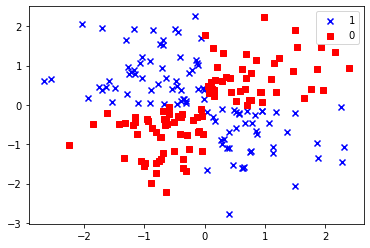

In [3]:
# 3：プロットしてみる------------------------------------------------------
%matplotlib inline
 
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1], c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==0, 0], X_xor[y_xor==0, 1], c='r', marker='s', label='0')
plt.legend(loc='best')
plt.show

In [4]:
# 4：データの整形-------------------------------------------------------
X_std=X_xor
z=y_xor

In [11]:
#データを学習データとテストデータに分ける
X_train, X_test, y_train, y_test=cross_validation.train_test_split(X_std,z, test_size=0.1, random_state=0)

In [12]:
# 解説5：グリッドサーチを設定する---------------------------------------------------
# SVCのカーネルはrbfかlinearとし、Cとγは0.01, 0.1, 1.0をそれぞれ検証することに設定しています。
clf=svm.SVC(class_weight="balanced", random_state=0)
param_range=[0.01, 0.1, 1.0] #変化させるパラメータに設定する値たち
param_grid=[{'C': param_range, 'kernel': ['rbf', 'linear'], 'gamma': param_range}] #Cとカーネルとgammaを変化させて最適化させる

In [18]:
# 解説6：グリッドサーチにより最適値を求める
# ここではグリッドサーチを10分割のクロスバリデーションで行い、その結果最もよかった識別率とパラメータ条件を求めています。
gs=GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=1)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9555555555555555
{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}


In [31]:
# 解説7：最適なパラメータをテストデータに適用し,結果を見る

# ここでは、学習データで最適だったパラメータ条件で、テストデータを識別した結果を求めています。
# 混合行列を見れば、各クラスのデータがどのように判定されていたのかを知ることができます。
# 縦方向が本当のクラス、横方向が判定されたクラスを示します。
# 今回の結果ですと、クラス0になるはずの2つが誤ってクラス1と判定されています。

# presitionは適合率です。
# クラス0と判定されたもののうち、本当にクラス0だった割合を示します。

# recallは再現率です。
# 本当はクラス0のうち、クラス0と判定されたものの割合を示します。

# F値は聞きなれないですが、その心は、「2クラス分類問題において、この識別器でクラス0と判定されたテストデータの結果に対して、どれくらい信頼性があるのか」を示す値です。
# クラス1をクラス0と判定したり、（適合率が低い）、クラス0をクラス1と判定してしまうと（再現率が低いと）、F値が減少します。
# これらのレポートはマルチクラスでも、自分のクラス対その他のクラスで計算することができます。

clf=gs.best_estimator_
score = clf.score(X_test, y_test)
print(score) #テストデータの正答率
pre = clf.predict(X_test)
cntmat = metrics.confusion_matrix(y_true=y_test, y_pred=pre)
print(cntmat) #混合行列の表示
report = metrics.classification_report(y_true=y_test, y_pred=pre)
print(report) #適合率、再現率、F値の結果

0.9
[[ 8  2]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.83      1.00      0.91        10

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.90        20
weighted avg       0.92      0.90      0.90        20



/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


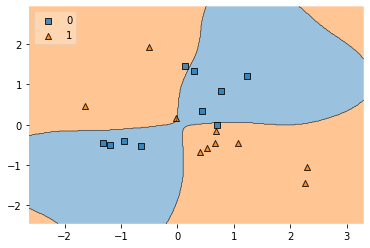

In [32]:
#plotする
X_train_plot=np.vstack(X_train)
train_label_plot=np.hstack(X_test)
X_test_plot=np.vstack(X_test)
test_label_plot=np.hstack(y_test)
plot_decision_regions(X_test_plot, test_label_plot, clf=clf, res=0.01, legend=2) #テストデータをプロット